## Plotting in Julia

* Plotting in Julia is conducted via [Plots.jl](https://github.com/JuliaPlots/Plots.jl) metapackage.
    - Defines an unified interface for plotting
    - Maps arguments to different plotting [backends](https://docs.juliaplots.org/latest/backends/#backends)
        - GR (default), PythonPlot, Plotly/PlotlyJS, and many more  
    - Mapping of attributes to backends: <https://docs.juliaplots.org/latest/generated/supported/>  
    - First runs can be slow. GR backend seems fastest and most stable.

In [1]:
versioninfo()

Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (x86_64-apple-darwin22.4.0)
  CPU: 8 × Intel(R) Core(TM) i5-8279U CPU @ 2.40GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-14.0.6 (ORCJIT, skylake)
  Threads: 2 on 8 virtual cores


In [2]:
using Pkg
Pkg.activate(pwd())
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Dropbox/class/M1399.000200/2023/M1300_000200-2023fall/lectures/02-juliaintro`


Status `~/Dropbox/class/M1399.000200/2023/M1300_000200-2023fall/lectures/02-juliaintro/Project.toml`
  [f0f68f2c] PlotlyJS v0.18.10
  [91a5bcdd] Plots v1.39.0
  [274fc56d] PythonPlot v1.0.3


## Plots.jl

We demonstrate Plots.jl below:

In [3]:
using Plots, Random

Random.seed!(123) # set seed
x = cumsum(randn(50, 2), dims=1);

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


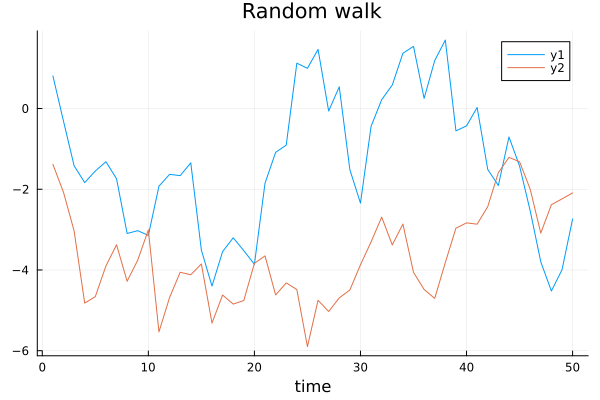

In [4]:
gr() # default backend
Plots.plot(x, title="Random walk", xlab="time")

    CondaPkg Found dependencies: /Users/jhwon/.julia/packages/PythonCall/qTEA1/CondaPkg.toml
    CondaPkg Found dependencies: /Users/jhwon/.julia/packages/PythonPlot/KcWMF/CondaPkg.toml
    CondaPkg Dependencies already up to date
┌ Warning: `PythonPlot` 1.0.3 is not compatible with this version of `Plots`. The declared compatibility is 1 - 1.0.2.
└ @ Plots ~/.julia/packages/Plots/sxUvK/src/backends.jl:55


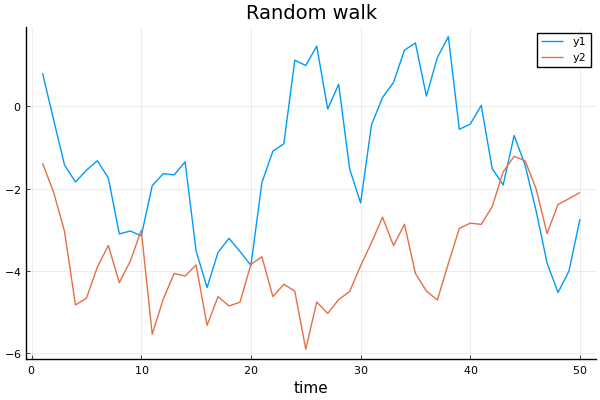

In [5]:
using PythonPlot
pythonplot()  # set the backend to PythonPlot
Plots.plot(x, title="Random walk", xlab="time")

WebIO._IJuliaInit()

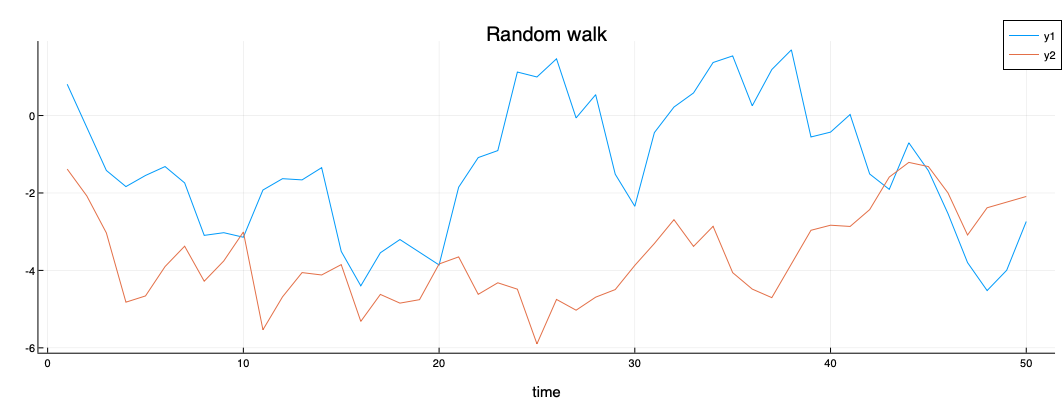

In [6]:
using PlotlyJS
plotlyjs()  # set the backend to PlotlyJS
Plots.plot(x, title="Random walk", xlab="time")

In [7]:
gr()
@gif for i in 1:20  # animated GIF
    Plots.plot(x -> sin(x) / (.2i), 0, i, xlim=(0, 20), ylim=(-.75, .75))
    scatter!(x -> cos(x) * .01 * i, 0, i, m=1)
end;

[ Info: Saved animation to /Users/jhwon/Dropbox/class/M1399.000200/2023/M1300_000200-2023fall/lectures/02-juliaintro/tmp.gif


![](tmp.gif)